In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('DataDownload2015.xlsx', sheet_name='Food Access Research Atlas')
df.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [3]:
df.set_index('CensusTract', inplace=True)
target_df = df[['LILATracts_halfAnd10']]
target_df.head()

,LILATracts_halfAnd10
CensusTract,
1001020100,0
1001020200,0
1001020300,0
1001020400,0
1001020500,0


In [32]:
df = df[['OHU2010', 'PovertyRate', 'MedianFamilyIncome', 'TractKids','TractSeniors','TractWhite','TractBlack','TractAsian', 
         'TractNHOPI','TractAIAN','TractOMultir','TractHispanic','TractHUNV','TractSNAP']]
df = df.join(target_df)
df.head()

,OHU2010,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,LILATracts_halfAnd10
CensusTract,,,,,,,,,,,,,,,
1001020100,693,10.0,74750,507,221,1622,217,14,0,14,45,44,26,112,0
1001020200,743,18.2,51875,606,214,888,1217,5,0,5,55,75,87,202,0
1001020300,1256,19.1,52905,894,439,2576,647,17,5,11,117,87,108,120,0
1001020400,1722,3.3,68079,1015,904,4086,193,18,4,11,74,85,19,82,0
1001020500,4082,8.5,77819,3162,1126,8666,1437,296,9,48,310,355,198,488,0


In [74]:
abc = pd.read_csv('./new-york-city-census-data/census_block_loc.csv')

##### target label info:
LILATracts_halfAnd10 = Low-income census tracts where a significant number (at least 500 people) or share (at least 33 percent) of the population is greater than ½ mile from the nearest supermarket, supercenter, or large grocery store for an urban area or greater than 10 miles for a rural area. Using this measure, an estimated 54.4 million people, or 17.7 percent of the U.S. population, live in tracts that are low-income and low access and are more than ½ mile or 10 miles from the nearest supermarket.

In [4]:
health_stats = pd.read_csv('500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2018_release.csv')
health_stats.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",...,"(83.4, 86.6)",20.0,"(18.5, 21.7)",45.5,"(44.3, 46.5)",5.6,"( 5.1, 6.1)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",...,"(81.9, 85.6)",20.6,"(18.8, 22.5)",44.5,"(43.2, 45.7)",5.9,"( 5.3, 6.5)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",...,"(82.3, 86.8)",19.3,"(17.6, 21.4)",45.7,"(44.2, 47.0)",5.7,"( 5.1, 6.4)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",...,"(82.1, 86.5)",21.8,"(19.8, 24.0)",46.1,"(44.5, 47.4)",7.7,"( 6.9, 8.6)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",...,"(82.2, 87.1)",25.1,"(22.9, 27.6)",48.3,"(46.6, 49.7)",9.5,"( 8.4, 10.6)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"


In [5]:
health_stats.set_index('TractFIPS', inplace=True)
health_stats.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
TractFIPS,,,,,,,,,,,,,,,,,,,,,
1073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",11.5,...,"(83.4, 86.6)",20.0,"(18.5, 21.7)",45.5,"(44.3, 46.5)",5.6,"( 5.1, 6.1)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",12.0,...,"(81.9, 85.6)",20.6,"(18.8, 22.5)",44.5,"(43.2, 45.7)",5.9,"( 5.3, 6.5)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
1073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",11.6,...,"(82.3, 86.8)",19.3,"(17.6, 21.4)",45.7,"(44.2, 47.0)",5.7,"( 5.1, 6.4)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",10.0,...,"(82.1, 86.5)",21.8,"(19.8, 24.0)",46.1,"(44.5, 47.4)",7.7,"( 6.9, 8.6)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",8.4,...,"(82.2, 87.1)",25.1,"(22.9, 27.6)",48.3,"(46.6, 49.7)",9.5,"( 8.4, 10.6)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"


In [34]:
combined_data = health_stats.join(df)
combined_data.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,LILATracts_halfAnd10
1073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",11.5,...,530.0,2384.0,25.0,0.0,7.0,96.0,82.0,141.0,260.0,1.0
1073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",12.0,...,498.0,1710.0,33.0,0.0,4.0,490.0,623.0,287.0,377.0,1.0
1073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",11.6,...,256.0,2927.0,10.0,0.0,7.0,138.0,162.0,246.0,501.0,1.0
1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",10.0,...,83.0,2684.0,1.0,10.0,5.0,81.0,89.0,345.0,522.0,1.0
1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",8.4,...,12.0,2538.0,1.0,0.0,1.0,25.0,12.0,198.0,506.0,1.0


In [62]:
combined_data[combined_data['PlaceName'] == "New York"]

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,target
36005000100,NY,New York,3651000,3651000-36005000100,11091,30.3,13.2,23.2,28.6,55.4,...,0.155441,0.587413,0.016229,0.002525,0.010549,0.227842,0.340727,NaN,NaN,0.0
36005000200,NY,New York,3651000,3651000-36005000200,4334,19.6,19.8,17.5,30.2,72.9,...,0.307337,0.291647,0.032303,0.003461,0.011998,0.353253,0.690586,0.202073,0.261288,0.0
36005000400,NY,New York,3651000,3651000-36005000400,5503,17.0,18.2,18.3,28.0,71.2,...,0.272033,0.315283,0.022533,0.001090,0.008723,0.380338,0.682355,0.278835,0.195969,0.0
36005001600,NY,New York,3651000,3651000-36005001600,5643,24.1,26.4,13.2,36.8,76.4,...,0.275740,0.406344,0.011164,0.000000,0.009569,0.297182,0.617048,0.485714,0.322078,0.0
36005001900,NY,New York,3651000,3651000-36005001900,1917,21.5,16.7,19.1,27.8,65.9,...,0.308294,0.334377,0.013041,0.000522,0.011476,0.332290,0.618675,0.956364,0.472727,0.0
36005002000,NY,New York,3651000,3651000-36005002000,8731,28.4,26.2,12.7,37.3,74.9,...,0.227351,0.442217,0.010194,0.001947,0.019127,0.299164,0.614019,0.681683,0.489897,0.0
36005002300,NY,New York,3651000,3651000-36005002300,4933,32.1,28.5,11.5,40.0,76.0,...,0.213663,0.450233,0.003243,0.000203,0.015204,0.317454,0.653355,0.915445,0.733371,0.0
36005002500,NY,New York,3651000,3651000-36005002500,5491,31.2,22.0,14.9,31.7,70.4,...,0.254598,0.247860,0.006556,0.000000,0.026043,0.464943,0.792023,0.717654,0.598684,0.0
36005002701,NY,New York,3651000,3651000-36005002701,3113,29.7,24.4,13.2,34.3,72.0,...,0.236428,0.421780,0.001606,0.000000,0.020238,0.319949,0.658529,0.807102,0.622841,0.0
36005002702,NY,New York,3651000,3651000-36005002702,4475,33.2,21.8,14.3,32.0,68.7,...,0.240447,0.302793,0.006927,0.000447,0.014749,0.434637,0.756425,0.868217,0.482171,0.0


In [35]:
combined_data.shape

(27210, 77)

In [36]:
combined_data.rename(columns={'LILATracts_halfAnd10': 'target'}, inplace=True)
combined_data.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,target
1073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,"(20.6, 26.3)",31.3,"(30.3, 32.5)",11.5,...,530.0,2384.0,25.0,0.0,7.0,96.0,82.0,141.0,260.0,1.0
1073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,"(25.2, 31.7)",30.2,"(29.0, 31.4)",12.0,...,498.0,1710.0,33.0,0.0,4.0,490.0,623.0,287.0,377.0,1.0
1073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,"(20.5, 27.6)",31.7,"(30.3, 33.0)",11.6,...,256.0,2927.0,10.0,0.0,7.0,138.0,162.0,246.0,501.0,1.0
1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,"(22.0, 29.9)",35.6,"(34.1, 37.0)",10.0,...,83.0,2684.0,1.0,10.0,5.0,81.0,89.0,345.0,522.0,1.0
1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,"(24.8, 34.2)",37.2,"(35.8, 38.6)",8.4,...,12.0,2538.0,1.0,0.0,1.0,25.0,12.0,198.0,506.0,1.0


In [37]:
to_drop = [x for x in combined_data.columns if x[-2:] == "CI"]

In [38]:
combined_data.drop(columns=to_drop, inplace=True)
combined_data.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,target
1073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,31.3,11.5,46.2,80.0,...,530.0,2384.0,25.0,0.0,7.0,96.0,82.0,141.0,260.0,1.0
1073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,30.2,12.0,45.6,80.3,...,498.0,1710.0,33.0,0.0,4.0,490.0,623.0,287.0,377.0,1.0
1073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,31.7,11.6,50.1,82.0,...,256.0,2927.0,10.0,0.0,7.0,138.0,162.0,246.0,501.0,1.0
1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,35.6,10.0,54.3,84.0,...,83.0,2684.0,1.0,10.0,5.0,81.0,89.0,345.0,522.0,1.0
1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,37.2,8.4,55.4,83.3,...,12.0,2538.0,1.0,0.0,1.0,25.0,12.0,198.0,506.0,1.0


#### Fixing demographic columns to percentages

In [40]:
dem_columns = combined_data.columns[-12:-3]
for column in dem_columns:
    combined_data[column] = combined_data[column]/combined_data['Population2010']
household_columns = combined_data.columns[-3:-1]
for column in household_columns:
    combined_data[column] = combined_data[column]/combined_data['OHU2010']

Index(['TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian',
       'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic'],
      dtype='object')

In [46]:
combined_data.head()

,StateAbbr,PlaceName,PlaceFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,...,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,target
1073000100,AL,Birmingham,107000,0107000-01073000100,3042,23.3,31.3,11.5,46.2,80.0,...,0.174227,0.783695,0.008218,0.000000,0.002301,0.031558,0.026956,0.125000,0.230496,1.0
1073000300,AL,Birmingham,107000,0107000-01073000300,2735,28.5,30.2,12.0,45.6,80.3,...,0.182084,0.625229,0.012066,0.000000,0.001463,0.179159,0.227788,0.278371,0.365664,1.0
1073000400,AL,Birmingham,107000,0107000-01073000400,3338,23.9,31.7,11.6,50.1,82.0,...,0.076693,0.876872,0.002996,0.000000,0.002097,0.041342,0.048532,0.207245,0.422072,1.0
1073000500,AL,Birmingham,107000,0107000-01073000500,2864,25.8,35.6,10.0,54.3,84.0,...,0.028980,0.937151,0.000349,0.003492,0.001746,0.028282,0.031075,0.289916,0.438655,1.0
1073000700,AL,Birmingham,107000,0107000-01073000700,2577,29.4,37.2,8.4,55.4,83.3,...,0.004657,0.984866,0.000388,0.000000,0.000388,0.009701,0.004657,0.206681,0.528184,1.0


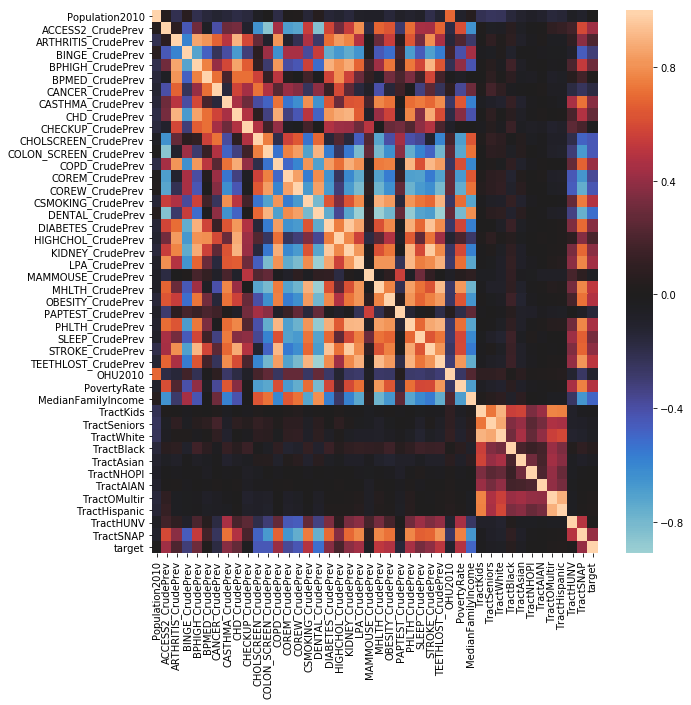

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(combined_data.iloc[:, 4:].corr(), center=0)

In [48]:
correlations = combined_data.corr().abs()

In [49]:
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))
potential_drop = [column for column in upper.columns if any(upper[column] > .90)]

In [50]:
potential_drop

['DENTAL_CrudePrev',
 'KIDNEY_CrudePrev',
 'MHLTH_CrudePrev',
 'PHLTH_CrudePrev',
 'STROKE_CrudePrev',
 'TEETHLOST_CrudePrev']

In [51]:
abs(combined_data[potential_drop].corr())

,DENTAL_CrudePrev,KIDNEY_CrudePrev,MHLTH_CrudePrev,PHLTH_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
DENTAL_CrudePrev,1.000000,0.716256,0.900197,0.877946,0.684837,0.909600
KIDNEY_CrudePrev,0.716256,1.000000,0.615162,0.905162,0.965567,0.781849
MHLTH_CrudePrev,0.900197,0.615162,1.000000,0.849397,0.626769,0.921823
PHLTH_CrudePrev,0.877946,0.905162,0.849397,1.000000,0.871482,0.902989
STROKE_CrudePrev,0.684837,0.965567,0.626769,0.871482,1.000000,0.809911
TEETHLOST_CrudePrev,0.909600,0.781849,0.921823,0.902989,0.809911,1.000000


In [53]:
X = combined_data.drop(columns=['StateAbbr', 'PlaceName', 'PlaceFIPS', 'Place_TractID', 'target'])

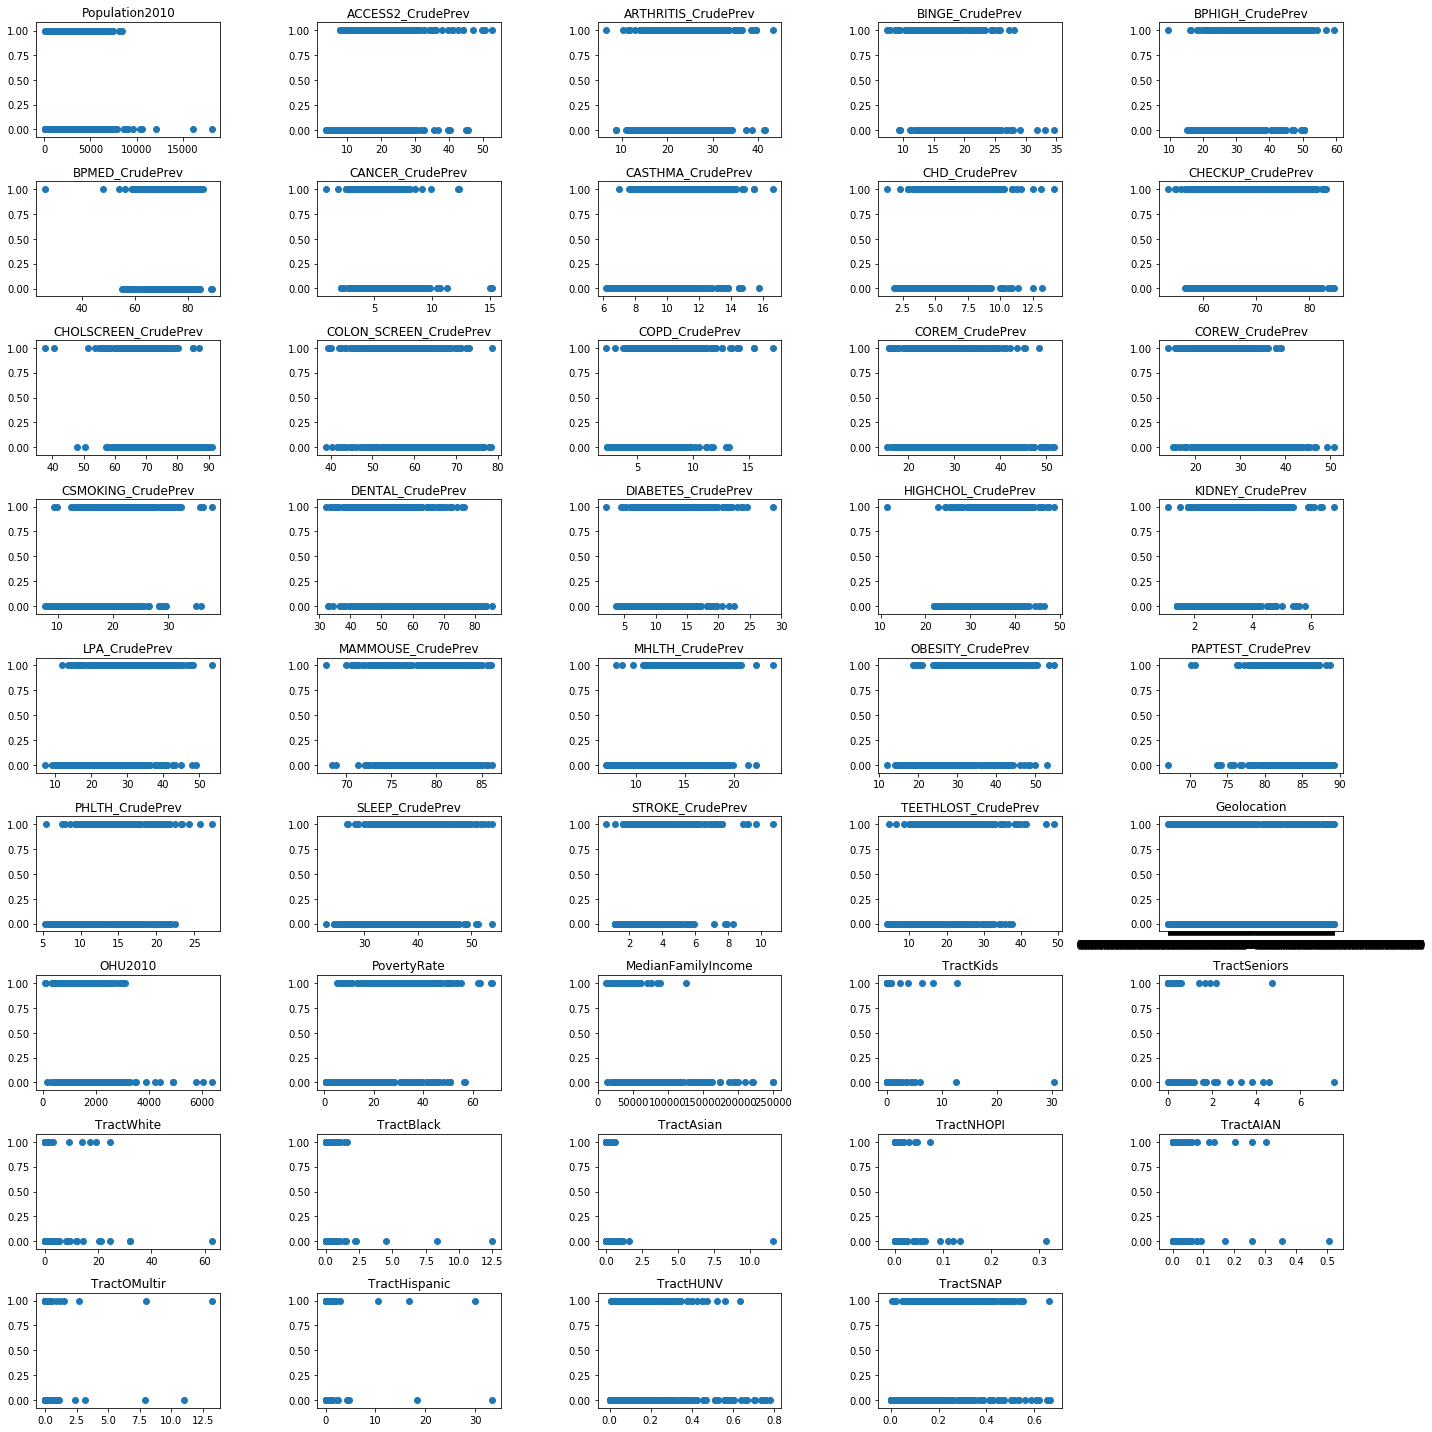

In [59]:
test = combined_data.sample(n=500)
plt.figure(figsize=(20,20))
for i, val in enumerate(X.columns):
    plt.subplot(9, 5, i+1)
    plt.scatter(test[val], test.target)
    plt.title(val)
    plt.tight_layout()
    
plt.show()